#### We will be prediciting the mpg (miles per gallon) for a car using the dataset provided.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('auto-mpg.csv')
data = df.copy()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


- Checking the size, dtypes for the columns, and column names

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
data = data.drop(['car name'],axis=1)

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


- Converting column 'Horsepower' to float64 dtype

In [6]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

- Checking the missing values

In [7]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

- Checking summary stats for columns with quantitative values

In [8]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


- Checking for outliers in the dataset

In [9]:
plt.style.use('seaborn-talk')
plt.style.use('ggplot')
palette = sns.color_palette('muted')

<AxesSubplot:xlabel='horsepower'>

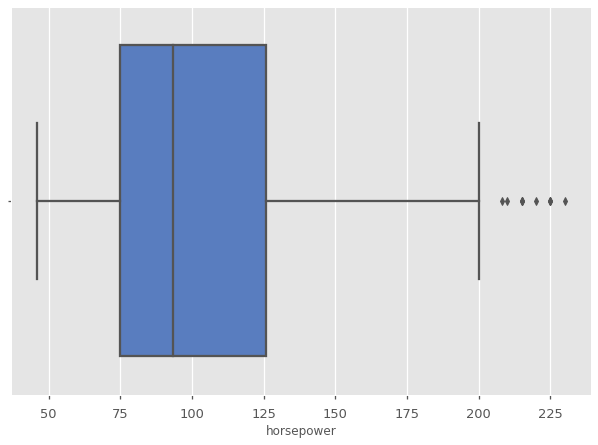

In [10]:
sns.boxplot(x=data['horsepower'],color=palette[0])

- Used the meian of the hiorsepower column to replace the missing values

In [11]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [12]:
data['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [13]:
data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

- Looking to see if there are any correlations

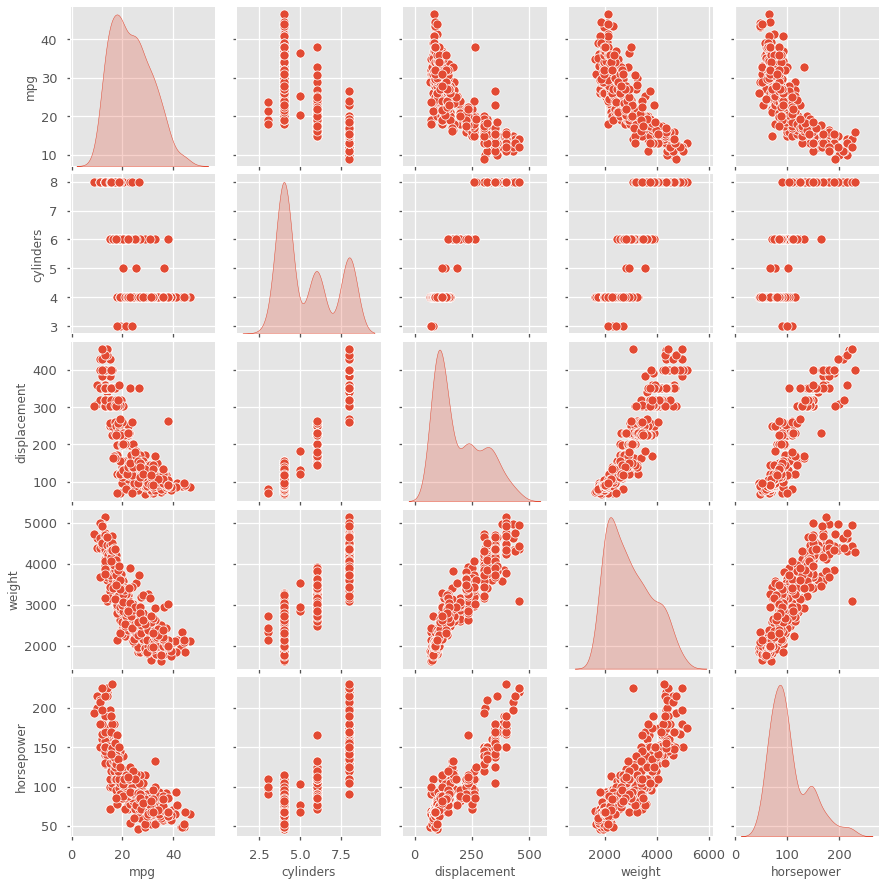

In [14]:
sns.pairplot(data[["mpg", "cylinders", "displacement", "weight", "horsepower"]],diag_kind='kde',palette=palette[0])

- We can see that our target column 'mpg' is negativley correlatd with the following columns:
    - displacement
    - weight
    - horsepower

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=27)
for train_index, test_index in split.split(data, data["cylinders"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

In [16]:
train_set['cylinders'].value_counts() / len(train_set)

4    0.512579
8    0.257862
6    0.210692
3    0.009434
5    0.009434
Name: cylinders, dtype: float64

In [17]:
test_set["cylinders"].value_counts() / len(test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: cylinders, dtype: float64

- The number codes in the origin column are for country of origin, so I replaced them with country names

In [18]:
train_set['origin'] = train_set['origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
train_set.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
350,34.7,4,105.0,63.0,2215,14.9,81,India
70,13.0,8,400.0,190.0,4422,12.5,72,India
367,28.0,4,112.0,88.0,2605,19.6,82,India
112,19.0,4,122.0,85.0,2310,18.5,73,India
71,19.0,3,70.0,97.0,2330,13.5,72,Germany
120,19.0,4,121.0,112.0,2868,15.5,73,USA
33,19.0,6,232.0,100.0,2634,13.0,71,India
198,33.0,4,91.0,53.0,1795,17.4,76,Germany
262,19.2,8,305.0,145.0,3425,13.2,78,India
153,18.0,6,250.0,105.0,3459,16.0,75,India


- Now we'll need to one-ho encode the origin column

In [19]:
train_set = pd.get_dummies(train_set, prefix='', prefix_sep='')
train_set.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Germany,India,USA
376,37.0,4,91.0,68.0,2025,18.2,82,1,0,0
75,14.0,8,318.0,150.0,4077,14.0,72,0,1,0
66,17.0,8,304.0,150.0,3672,11.5,72,0,1,0
254,20.2,6,200.0,85.0,2965,15.8,78,0,1,0
129,31.0,4,79.0,67.0,1950,19.0,74,1,0,0


- Testing new variables by checking their correlation w.r.t. MPG

In [20]:
data['disp_on_power'] = data['displacement'] / data['horsepower']
data['weight_on_cylr'] = data['weight'] / data['cylinders']
data['acc_on_power'] = data['acceleration'] / data['horsepower']
data['acc_on_cyl'] = data['acceleration'] / data['cylinders']

In [21]:
data.corr()['mpg'].sort_values(ascending=False)

mpg               1.000000
acc_on_cyl        0.732133
acc_on_power      0.704240
model year        0.579267
origin            0.563450
acceleration      0.420289
weight_on_cylr   -0.020778
disp_on_power    -0.577236
horsepower       -0.773453
cylinders        -0.775396
displacement     -0.804203
weight           -0.831741
Name: mpg, dtype: float64

- We can see 2 of the new variables created (acc_on_cyl & acc_on_power) are more highly positivley correlated with mpg than any of the original variables

### Automating the process of data preperation for modelling

In [22]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [24]:
df['horsepower'] =  pd.to_numeric(df['horsepower'], errors='coerce')
df.drop(['car name'],axis=1,inplace=True)

In [25]:
df['origin'] = df['origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [27]:
labels = df['mpg']

In [28]:
cat_df,num_df = df['origin'], df.iloc[:,1:-1]

In [29]:
acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power  # new optional variable
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix] # required new variable
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl] # returns a 2D array
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(num_df.values)
data_tr_extra_attrs[0]

array([8.00000000e+00, 3.07000000e+02, 1.30000000e+02, 3.50400000e+03,
       1.20000000e+01, 7.00000000e+01, 9.23076923e-02, 1.50000000e+00])

In [30]:
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument: data - original dataframe 
    Returns: num_attrs - numerical dataframe ; num_pipeline - numerical pipeline object  
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

In [31]:
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [32]:
prepared_data = pipeline_transformer(df)
prepared_data[0]

array([-0.7064387 ,  1.49819126,  1.0906037 ,  0.67311762,  0.63086987,
       -1.29549834, -1.62742629, -1.30087953,  0.42342354,  0.        ,
        1.        ,  0.        ])

In [33]:
prepared_data[-1]

array([ 0.95891297, -0.85632057, -0.71467988, -0.58426372, -0.29608816,
        1.39128549,  1.62198339,  1.07479825, -0.69015014,  0.        ,
        1.        ,  0.        ])

#### The data is now ready for modelling